# Projet de Machine Learning 

**Yacouba CISSE & Akbar FAHARDINE**

# 1) Présentation de la problématique et importation des données 

## 1.1) Présentation de la problématique

Ce challenge consiste à **prédire les prix des maisons en Inde** en utilisant des techniques de régression. La prédiction est complexe car le prix dépend de divers facteurs au-delà de la taille du logement. Avec 12 variables disponibles, l’objectif est de **concevoir le modèle de machine learning le plus précis possible**.


## 1.2) Importation des données

le jeu de donnée issu de kaggle est structuré en train et test : [Inde Housting](https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge?resource=download&select=train.csv)

**Train.csv** - 29451 rangées x 12 colonnes

**Test.csv** - 68720 lignes x 11 colonnes

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [7]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [9]:
# information sur les données 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [11]:
# Analyse des valeurs manquantes 
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Nous n'avons pas de valeurs manquantes 

In [14]:
# Description des tables 
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# 2) Présentation des variables 

Les variables présentent dans le jeu de donnée sont les suivantes : 

- `PUBLIÉ_PAR` : Marquage de la catégorie qui a répertorié la propriété
- `SOUS_CONSTRUCTION`: En construction ou non
- `RERA`: Rera approuvé ou non
- `BHK_NON`: Nombre de chambres
- `BHK_OU_RK`: Type de propriété
- `SQUARE_FT`: Superficie totale de la maison en pieds carrés
- `PRÊT_À_DÉMÉLARER`: Marquage de catégorie Prêt à déménager ou non
- `REVENTE`: Marquage de la catégorie Revente ou non
- `ADRESSE`: Adresse de la propriété
- `LONGITUDE`: Longueur de la propriété
- `LATITUDE`: Latitude de la propriété
- `TARGET(PRICE_IN_LACS)`: Prix des maisons

## 2.1) Variables numériques

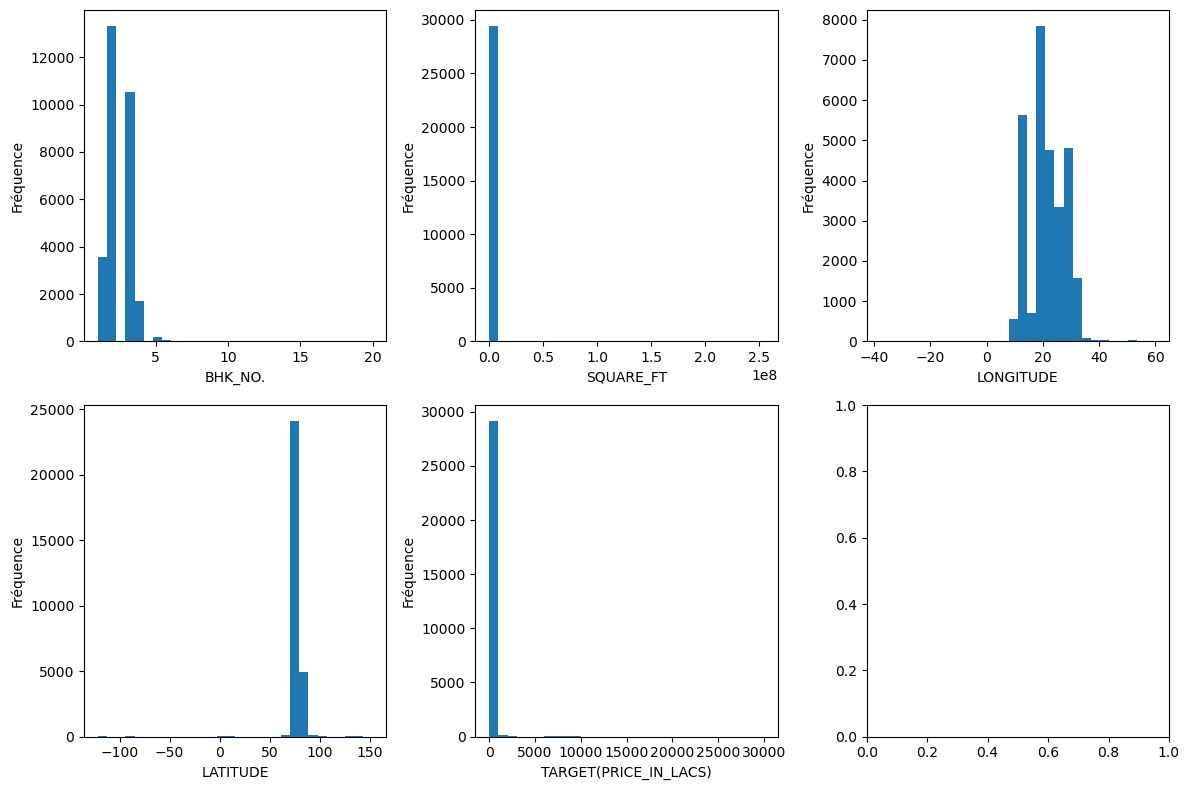

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
# Sélection des variables quantitatives en excluant les variables catégorielles et binaires
combined_columns = ['POSTED_BY', 'RERA', 'BHK_OR_RK', 'RESALE', 'READY_TO_MOVE', 'ADDRESS', 'UNDER_CONSTRUCTION']
quant_vars = train.select_dtypes(include=np.number).columns
quant_vars = [var for var in quant_vars if var not in combined_columns]

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()

# Boucle pour tracer les histogrammes
for i, var in enumerate(quant_vars):
    axs[i].hist(train[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

Nos données sont asymétrie nous allons donc chercher à les symétrisés. cela pourrait permettre de : 

- faciliter l’application des méthodes statistiques
- réduire l’influence des valeurs extrêmes,
  Aaméliorer les visualisations,
- Favoriser l’identification des relations
- Accélérer la convergence des algorithmes
- de rendre les analyses comparables et d’améliorer l’interprétation des modèles.

## 2.2) Symetrisation des valeurs numeriques 

### a) Distributions 

/var/folders/jy/7z75rm994b52gc57kcl9jhr40000gn/T/ipykernel_5570/238223676.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.21461659 1.21461659 1.21461659 ... 1.21461659 1.21461659 1.21461659]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column_transformed[non_null_mask] = transformed_data


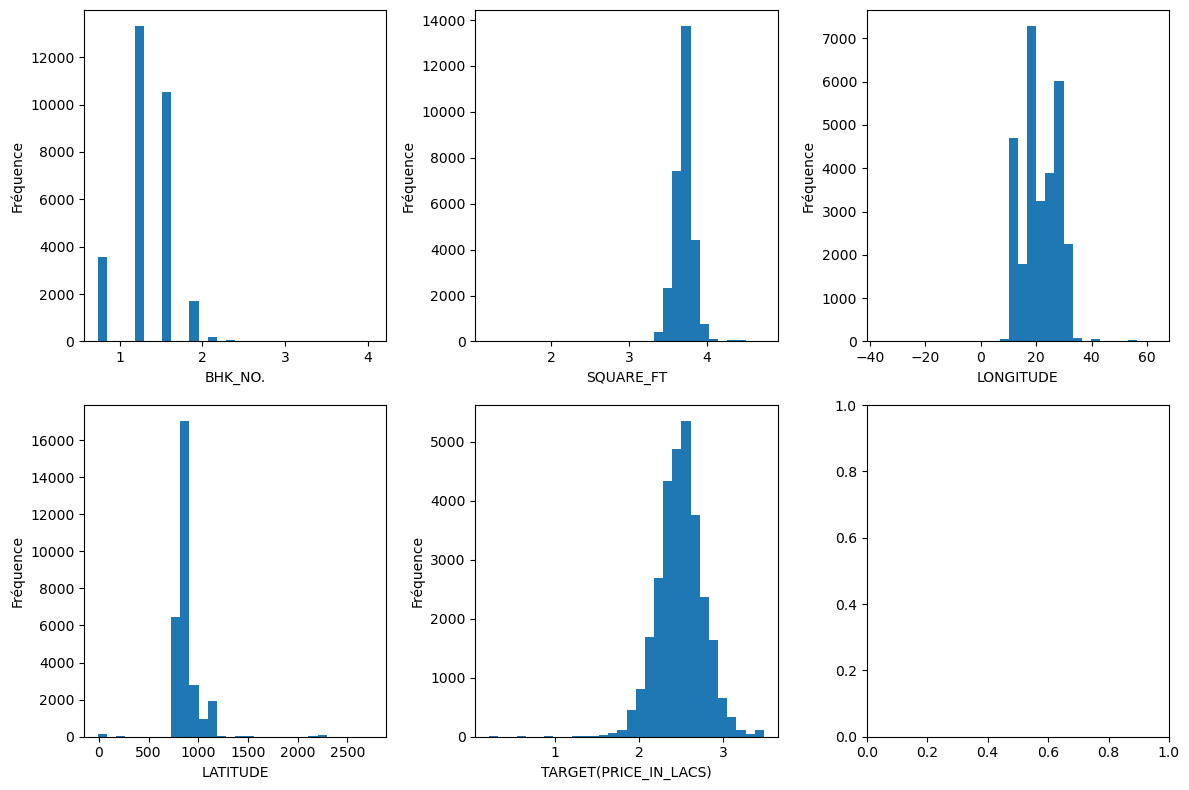

In [24]:
from scipy.stats import yeojohnson

# Fonction pour appliquer Yeo-Johnson uniquement aux valeurs non nulles
def apply_yeojohnson(column):
    non_null_mask = column.notnull()  # Masque des valeurs non nulles
    transformed_data, _ = yeojohnson(column[non_null_mask])
    column_transformed = column.copy()
    column_transformed[non_null_mask] = transformed_data
    return column_transformed
    
train_sym = train
# Application Yeo-Johnson sur chaque colonne
train_sym['BHK_NO.'] = apply_yeojohnson(train['BHK_NO.'])
train_sym['SQUARE_FT'] = apply_yeojohnson(train['SQUARE_FT'])
train_sym['LONGITUDE'] = apply_yeojohnson(train['LONGITUDE'])
train_sym['LATITUDE'] = apply_yeojohnson(train['LATITUDE'])
train_sym['TARGET(PRICE_IN_LACS)'] = apply_yeojohnson(train['TARGET(PRICE_IN_LACS)'])

# Sélection des variables quantitatives en excluant les variables catégorielles et binaires
combined_columns = ['POSTED_BY', 'RERA', 'BHK_OR_RK', 'RESALE', 'READY_TO_MOVE', 'ADDRESS', 'UNDER_CONSTRUCTION']
quant_vars = train_sym.select_dtypes(include=np.number).columns
quant_vars = [var for var in quant_vars if var not in combined_columns]

# Création des subplots pour chaque variable quantitative
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()

# Boucle pour tracer les histogrammes
for i, var in enumerate(quant_vars):
    axs[i].hist(train[var].dropna(), bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [26]:
print(train_sym[['LONGITUDE', 'LATITUDE']].isnull().sum())

LONGITUDE    0
LATITUDE     0
dtype: int64


### b) Boxplot

In [29]:
train_sym['LONGITUDE'] = train_sym['LONGITUDE'].fillna(train_sym['LONGITUDE'].median())
train_sym['LATITUDE'] = train_sym['LATITUDE'].fillna(train['LATITUDE'].median())

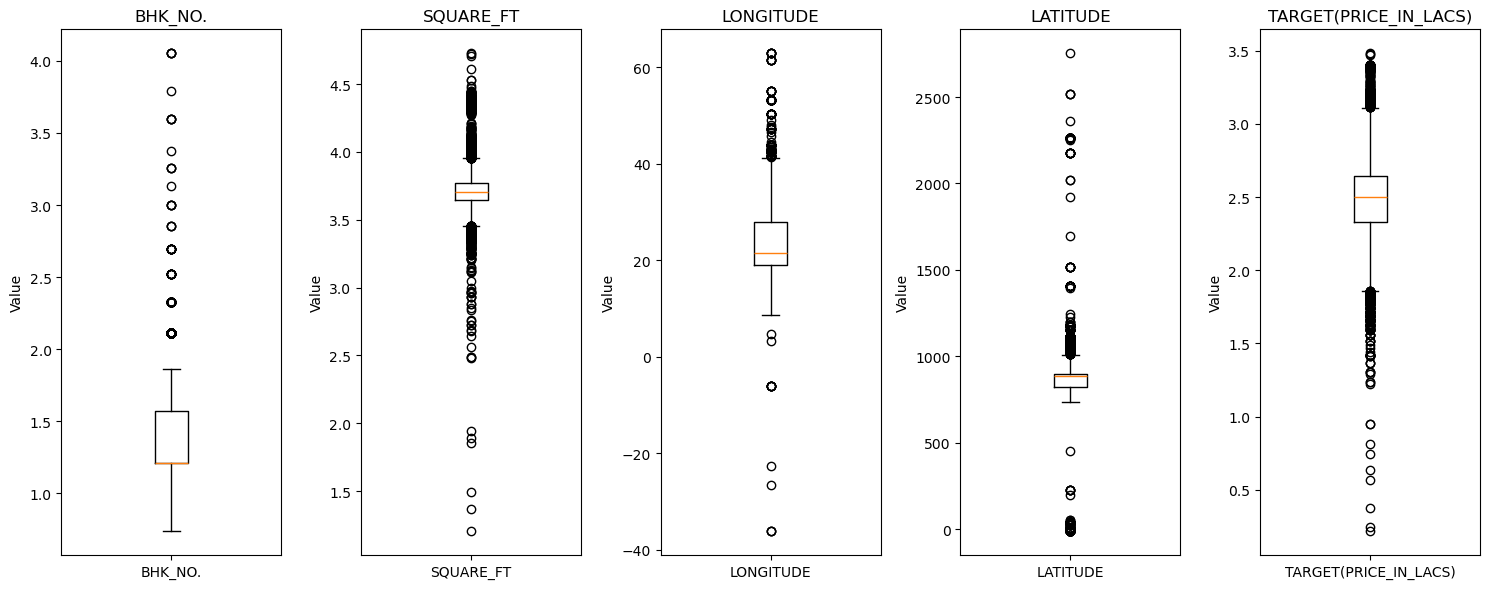

In [31]:
import matplotlib.pyplot as plt

# Sélectionne les variables numériques
quant_vars = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

# Crée une figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(nrows=1, ncols=len(quant_vars), figsize=(15, 6))

# Génére un box plot pour chaque variable numérique
for i, var in enumerate(quant_vars):
    axs[i].boxplot(train[var])
    axs[i].set_title(var)
    axs[i].set_ylabel('Value')
    axs[i].set_xticklabels([var])

# Ajuste l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [33]:
def calculate_extreme_percentage(train, quant_vars):
    extreme_percentages = {}
    
    for var in quant_vars:
        # Calcul des quartiles
        Q1 = train[var].quantile(0.25)
        Q3 = train[var].quantile(0.75)
        IQR = Q3 - Q1
        
        # Défini les seuils pour les valeurs extrêmes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compte le nombre de valeurs extrêmes
        extreme_values = train[(train[var] < lower_bound) | (train[var] > upper_bound)]
        extreme_percentage = len(extreme_values) / len(train) * 100
        
        extreme_percentages[var] = extreme_percentage
    
    return extreme_percentages

# Exemple d'utilisation
extreme_percentages = calculate_extreme_percentage(train_sym, quant_vars)
print(extreme_percentages)

{'BHK_NO.': 0.9643136056500629, 'SQUARE_FT': 3.7452038980000677, 'LONGITUDE': 0.49234321415232085, 'LATITUDE': 10.183015856846966, 'TARGET(PRICE_IN_LACS)': 2.2240331397915183}


La suppression des valeurs extrêmes peut avoir un changement dans la taille de l’échantillon. 
En effet, Si un pourcentage important de données est supprimé,la taille de votre échantillon 
pourrait être significativement réduite, ce qui peut affecter la robustesse des analyses statistiques
et des modèles. Par exemple, La suppression des 10,18 % d’extrêmes dans ‘LATITUDE’ risque de réduire 
fortement la couverture géographique de votre étude.


    

## 2.3) Variables catégorielles 

In [37]:
# identification des variables catégorielle 
def find_categorical_and_binary_columns(df):
    # Sélectionne les colonnes de type 'object' ou 'category'
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Identifie les colonnes binaires (avec exactement 2 valeurs uniques)
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    
    # Combine les deux listes en évitant les doublons
    combined_columns = list(set(categorical_columns + binary_columns))
    
    return combined_columns

# Exemple d'utilisation avec le jeu de données train
categorical_and_binary_columns = find_categorical_and_binary_columns(train)
print("Variables catégorielles et binaires :", categorical_and_binary_columns)

Variables catégorielles et binaires : ['UNDER_CONSTRUCTION', 'RESALE', 'RERA', 'READY_TO_MOVE', 'BHK_OR_RK', 'POSTED_BY', 'ADDRESS']


In [39]:
# Mapping des catégories à des valeurs numériques
mapping = {"Owner": 0, "Dealer": 1, "Builder": 2}

# Applique le mapping à la colonne POSTED_BY
train_sym['POSTED_BY'] = train_sym['POSTED_BY'].map(mapping)
test['POSTED_BY'] = test['POSTED_BY'].map(mapping)

# Vérification des premières lignes après transformation
print(train_sym['POSTED_BY'].head())
print(test['POSTED_BY'].head())

# Mapping des catégories à des valeurs numériques
mapping_bhk_or_rk = {"BHK": 0, "RK": 1}

# Applique le mapping à la colonne BHK_OR_RK
train_sym['BHK_OR_RK'] = train_sym['BHK_OR_RK'].map(mapping_bhk_or_rk)
test['BHK_OR_RK'] = test['BHK_OR_RK'].map(mapping_bhk_or_rk)

# Vérification des premières lignes après transformation
print(train_sym['BHK_OR_RK'].head())
print(test['BHK_OR_RK'].head())

0    0
1    1
2    0
3    0
4    1
Name: POSTED_BY, dtype: int64
0    0
1    1
2    1
3    1
4    0
Name: POSTED_BY, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: BHK_OR_RK, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: BHK_OR_RK, dtype: int64


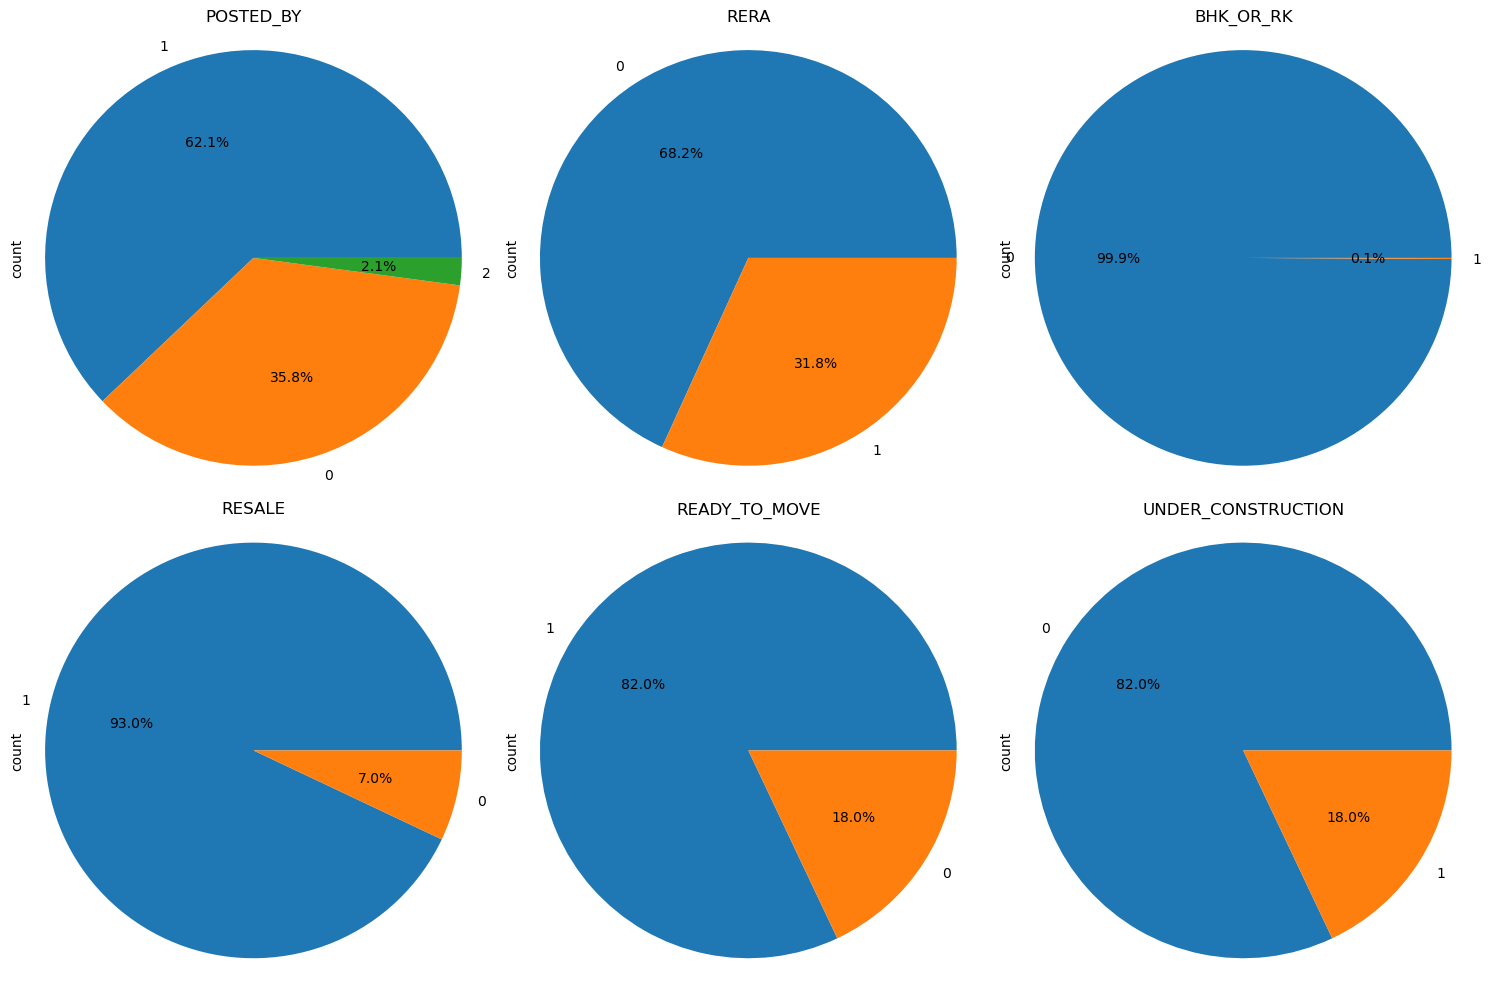

In [41]:
# Sélectionne les variables catégorielles
cat_vars = ['POSTED_BY', 'RERA', 'BHK_OR_RK', 'RESALE', 'READY_TO_MOVE', 'UNDER_CONSTRUCTION']

# Crée une figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Ajuste la disposition selon le nombre de variables
axs = axs.flatten()

# Génére un pie plot pour chaque variable catégorielle
for i, var in enumerate(cat_vars):
    train[var].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[i], legend=False)
    axs[i].set_title(var)
    axs[i].axis('equal')  # Pour rendre les secteurs égaux

# Ajuste l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

- **POSTED_BY** :
62.1% des maisons sont publiées par le groupe 1, 35.8% par le groupe 0 et 2.1% par le groupe 2. Cela montre qu’une majorité des annonces proviennent du groupe 1, tandis que les groupes 0 et 2 représentent des proportions beaucoup plus faibles.
- **RERA** :
68.2% des maisons ne sont pas enregistrées sous RERA (Real Estate Regulatory Authority), tandis que 31.8% le sont. Cela indique que la majorité des maisons dans le dataset ne sont pas réglementées par RERA.
- **BHK_OR_RK** :
99.9% des maisons sont de type BHK (probablement des maisons avec plusieurs chambres), tandis que 0.1% sont de type RK (probablement un autre type de logement). Cela montre que presque toutes les maisons dans le dataset sont de type BHK.
- **UNDER_CONSTRUCTION** :
82.0% des maisons sont prêtes à emménager (0), tandis que 18.0% sont encore en construction (1). Cela suggère que la majorité des maisons disponibles sur le marché sont prêtes à être occupées.
- **RESALE** :
93.0% des maisons ne sont pas revendues (0), tandis que 7.0% le sont. Cela montre que la plupart des maisons dans ce dataset sont des maisons neuves plutôt que des maisons revendues.
- **READY_TO_MOVE** :
82.0% des maisons sont prêtes à emménager (1), tandis que 18.0% ne le sont pas (0). Cela indique que la majorité des maisons sont prêtes à être occupées immédiatement.

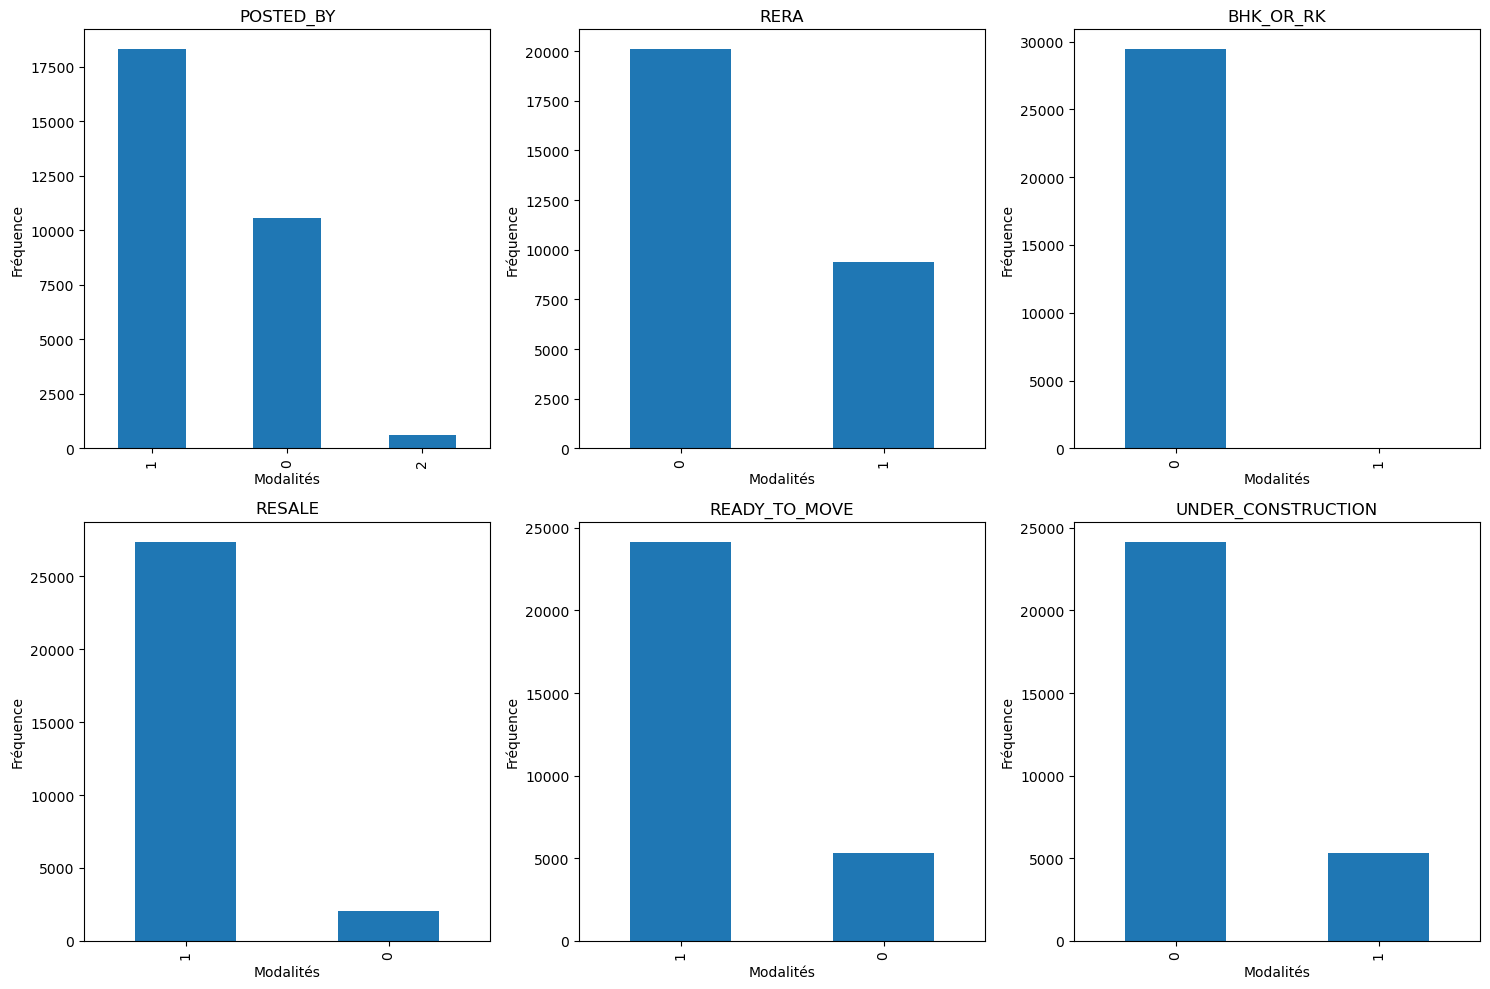

In [43]:
import matplotlib.pyplot as plt

# Sélectionne les variables catégorielles
cat_vars = ['POSTED_BY', 'RERA', 'BHK_OR_RK', 'RESALE', 'READY_TO_MOVE', 'UNDER_CONSTRUCTION']

# Crée une figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Ajuste la disposition selon le nombre de variables
axs = axs.flatten()

# Génére un bar plot pour chaque variable catégorielle
for i, var in enumerate(cat_vars):
    train_sym[var].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('Modalités')
    axs[i].set_ylabel('Fréquence')

# Ajuste l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [39]:
train_sym.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,1.214617,0,3.728228,1,1,"Ksfc Layout,Bangalore",13.347157,892.343235,2.457427
1,1,0,0,1.214617,0,3.723805,1,1,"Vishweshwara Nagar,Mysore",12.622959,874.275640,2.432108
2,0,0,0,1.214617,0,3.650897,1,1,"Jigani,Bangalore",13.147269,892.994733,2.373147
3,0,0,1,1.214617,0,3.650058,1,1,"Sector-1 Vaishali,Ghaziabad",29.783485,887.525245,2.499230
4,1,1,0,1.214617,0,3.667229,0,1,"New Town,Kolkata",23.416800,1109.063801,2.488720


# 3) Analyses bivariées et sélection des variables pertinentes

## 3.1) Corrélation entre les variables numériques

La matrice de corrélation permet de mieux comprendre les interrelations, d’optimiser la sélection des variables et d’éviter des erreurs dans la construction du modèle.

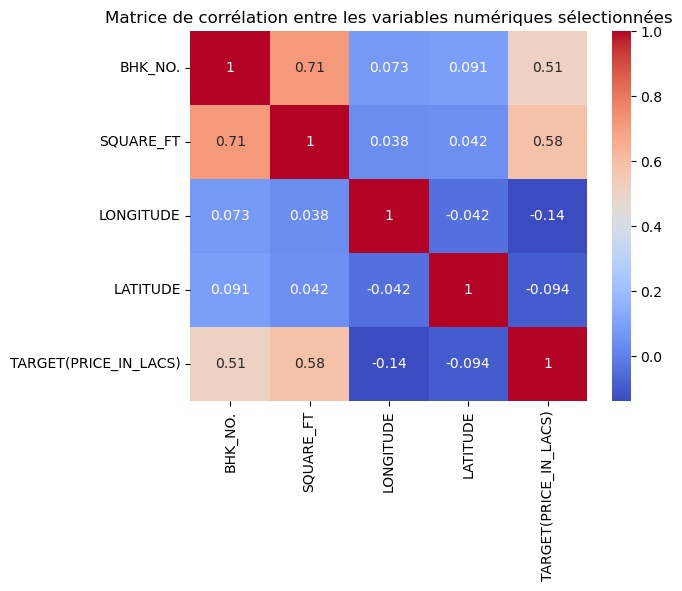

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne uniquement les variables dans quant_vars
quant_vars = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

# Corrélation entre les variables numériques sélectionnées
corr_matrix = train_sym[quant_vars].corr()

# Affichage de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques sélectionnées')
plt.show()

Les variables les plus influentes sur le prix des maisons dans ce modèle semblent être la surface (Square_FT) et le nombre de chambres (BHK_NO.), ce qui est logique. Les variables géographiques (Longitude et Latitude) ont une faible influence.

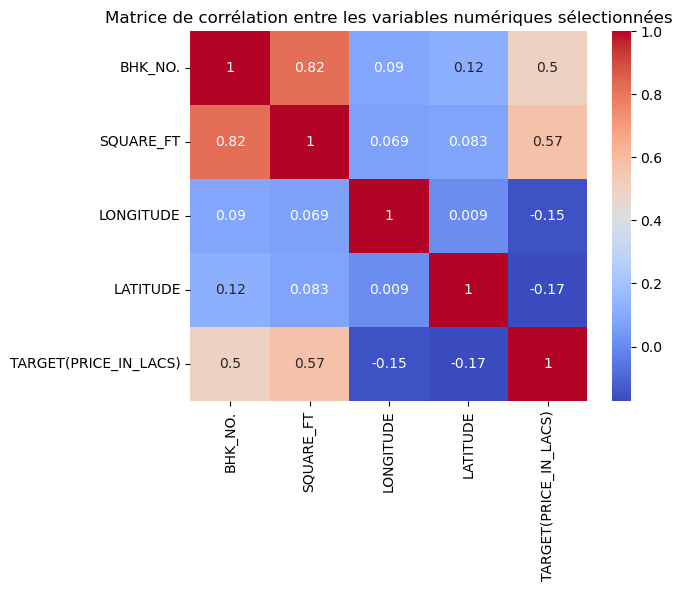

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne uniquement les variables dans quant_vars
quant_vars = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

# Corrélation entre les variables numériques sélectionnées
corr_matrix = train_sym[quant_vars].corr(method='spearman')

# Affichage de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques sélectionnées')
plt.show()

La surface en pieds carrés (Square_FT) et le nombre de chambres (BHK_NO.) sont les variables les plus significatives pour prédire le prix d’une maison dans ce dataset, tandis que la géographie semble avoir un impact faible sur les prix dans ce modèle.

## 3.2) Relation entre la variable cible 'TARGET(PRICE_IN_LACS)' et les variables numériques

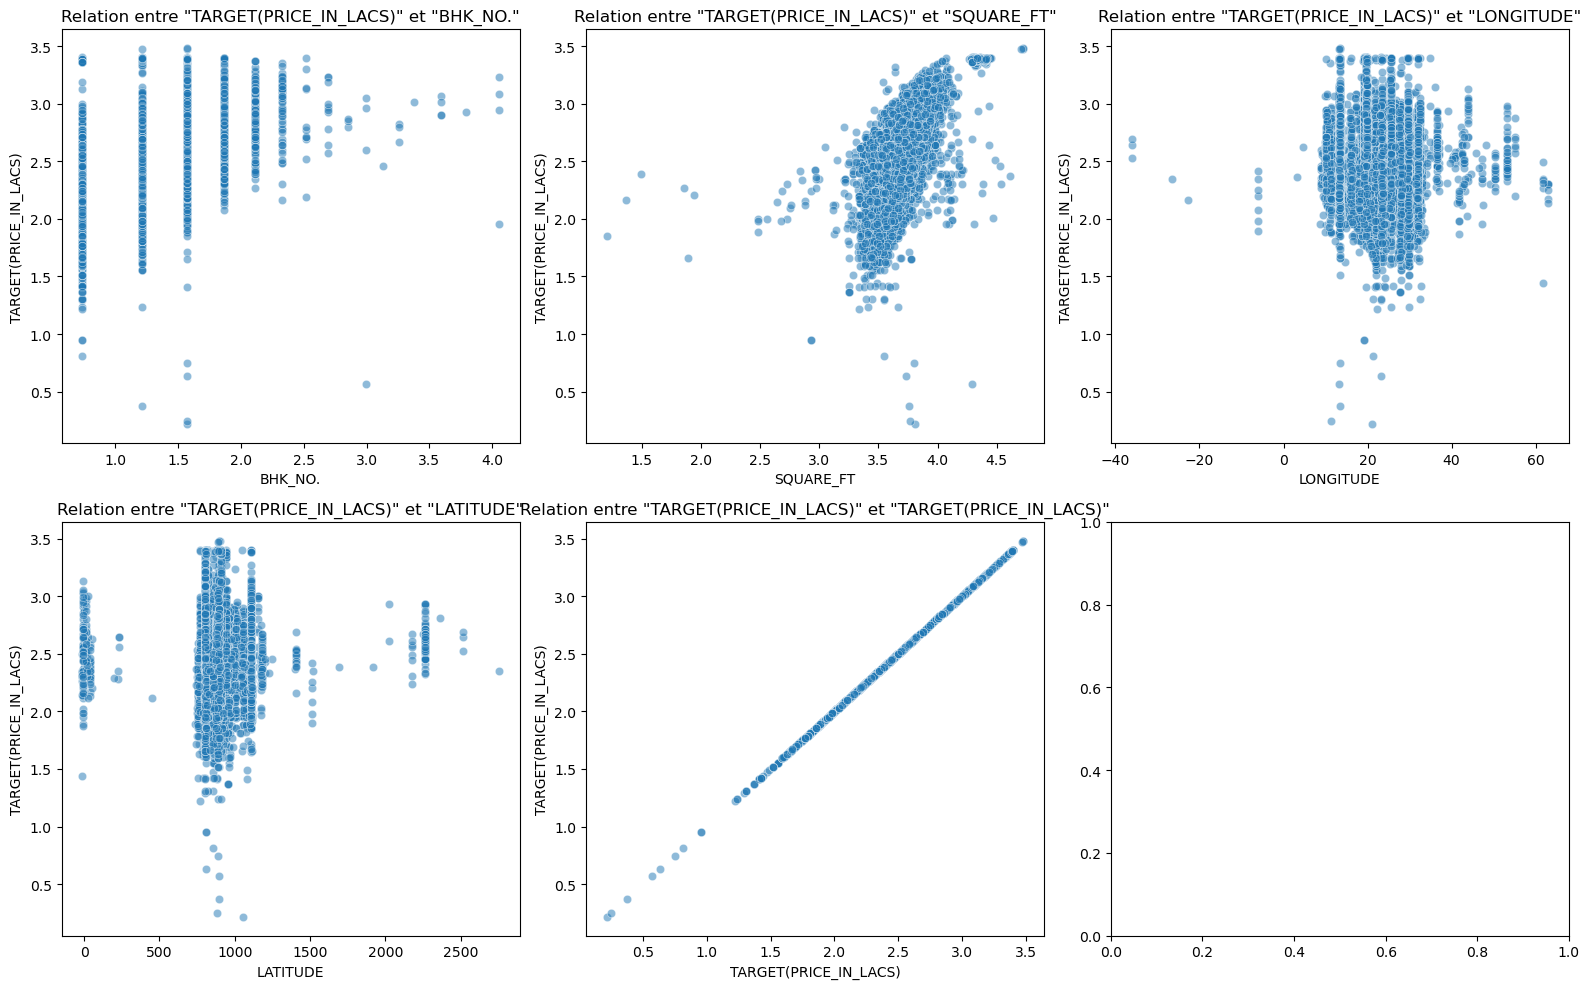

In [48]:
# Sélection des variables numériques
quant_vars = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(quant_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(quant_vars):
    sns.scatterplot(x=var, y='TARGET(PRICE_IN_LACS)', data=train, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "TARGET(PRICE_IN_LACS)" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()

- Relation entre “TARGET(PRICE_IN_LACS)” et “BHK_NO.” :
On remarque que le prix des maisons reste relativement stable pour un nombre de chambres inférieur, puis augmente légèrement lorsque le nombre de chambres augmente. Toutefois, la relation n’est pas très linéaire. Cela peut indiquer que d’autres facteurs influencent davantage le prix, mais que le nombre de chambres reste une variable pertinente.

- Relation entre “TARGET(PRICE_IN_LACS)” et “SQUARE_FT” :
La relation entre la surface (SQUARE_FT) et le prix des maisons est clairement positive, avec un gain évident en prix pour des surfaces plus grandes. Cela confirme l’hypothèse selon laquelle une plus grande superficie entraîne un prix plus élevé.

- Relation entre “TARGET(PRICE_IN_LACS)” et “LONGITUDE” :
La relation semble faible et relativement dispersée, avec une faible tendance à influencer le prix, ce qui confirme la faible corrélation entre la longitude et le prix.

- Relation entre “TARGET(PRICE_IN_LACS)” et “LATITUDE” :
Cette relation montre également une faible influence sur le prix, similaire à la longitude, suggérant que la position géographique ne joue pas un rôle majeur dans la détermination du prix dans ce modèle particulier.



## 3.3) Relation entre la variable cible 'TARGET(PRICE_IN_LACS)' et les variables catégorielles

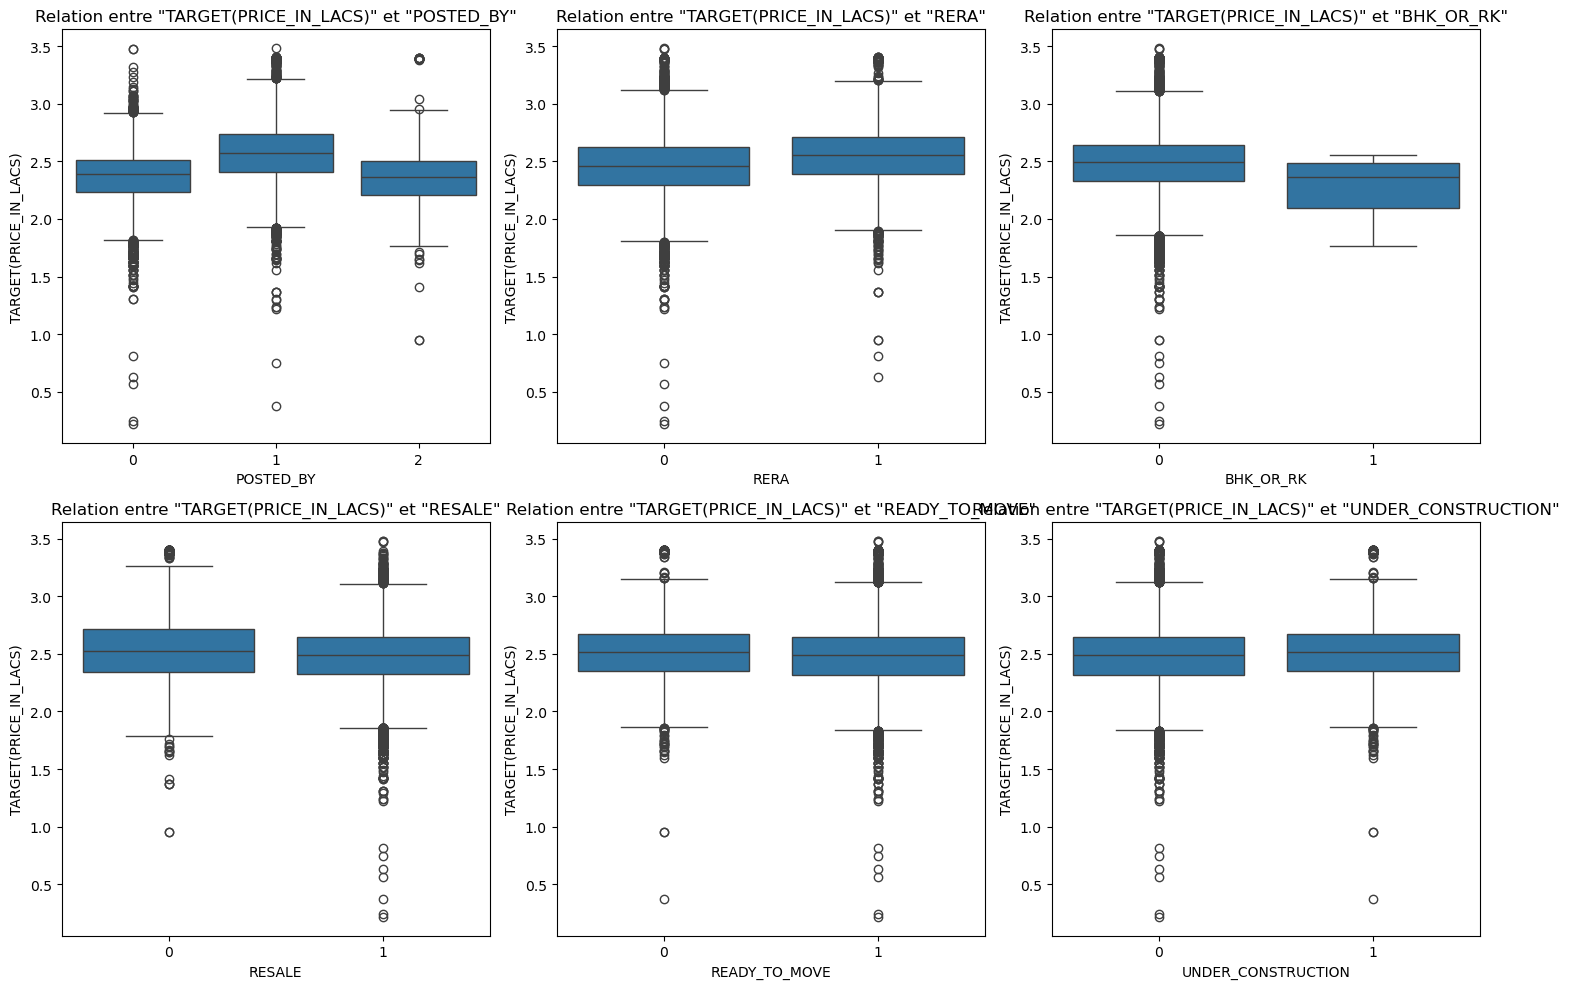

In [51]:
# Liste des variables catégorielles
cat_vars = ['POSTED_BY', 'RERA', 'BHK_OR_RK', 'RESALE', 'READY_TO_MOVE', 'UNDER_CONSTRUCTION']

# Détermine le nombre de lignes et de colonnes pour les subplots
n_vars = len(cat_vars)
n_cols = 3  # Choisir le nombre de colonnes pour les graphiques
n_rows = (n_vars // n_cols) + (n_vars % n_cols)

# Crée les subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()

# Génére un boxplot pour chaque variable catégorielle et la variable cible
for i, var in enumerate(cat_vars):
    sns.boxplot(x=var, y='TARGET(PRICE_IN_LACS)', data=train, ax=axs[i])
    axs[i].set_title(f'Relation entre "TARGET(PRICE_IN_LACS)" et "{var}"')

# Ajuste l'affichage pour éviter le chevauchement des titres
plt.tight_layout()
plt.show()

- Relation entre “TARGET(PRICE_IN_LACS)” et “POSTED_BY” :
La variable POSTED_BY semble avoir une faible variation de prix entre ses catégories, mais les boîtes montrent une légère tendance à des prix plus bas dans certaines catégories. Cela pourrait indiquer que la source de publication a une influence faible mais notable sur les prix.

- Relation entre “TARGET(PRICE_IN_LACS)” et “RERA” :
La RERA montre une légère différence dans les prix, avec des maisons dont les prix sont légèrement plus élevés dans les catégories RERA (1). Cela peut suggérer que les maisons avec un enregistrement RERA pourraient être perçues comme ayant une plus grande valeur en raison de la transparence ou de la régulation.

- Relation entre “TARGET(PRICE_IN_LACS)” et “BHK_OR_RK” :
BHK_OR_RK semble diviser les prix en deux groupes distincts, avec une différence évidente de prix entre les maisons de type BHK et celles de type RK . Cela confirme que le type de logement a un impact sur les prix.

- Relation entre “TARGET(PRICE_IN_LACS)” et “RESALE” :
La variable RESALE montre que les maisons revendues  ont une gamme de prix plus large, ce qui pourrait refléter un marché secondaire plus compétitif et potentiellement plus abordable.

- Relation entre “TARGET(PRICE_IN_LACS)” et “READY_TO_MOVE” :
Les maisons prêtes à emménager  semblent être dans une gamme de prix plus élevée, ce qui pourrait indiquer que les acheteurs préfèrent les maisons prêtes à vivre immédiatement, en acceptant de payer un peu plus.

- Relation entre “TARGET(PRICE_IN_LACS)” et “UNDER_CONSTRUCTION” :
Les maisons UNDER_CONSTRUCTION montrent des prix qui varient largement, mais généralement plus bas, ce qui est attendu car elles ne sont pas encore disponibles pour les acheteurs, ce qui peut affecter leur prix.

## 3.4) Relation entre les variables numériques 

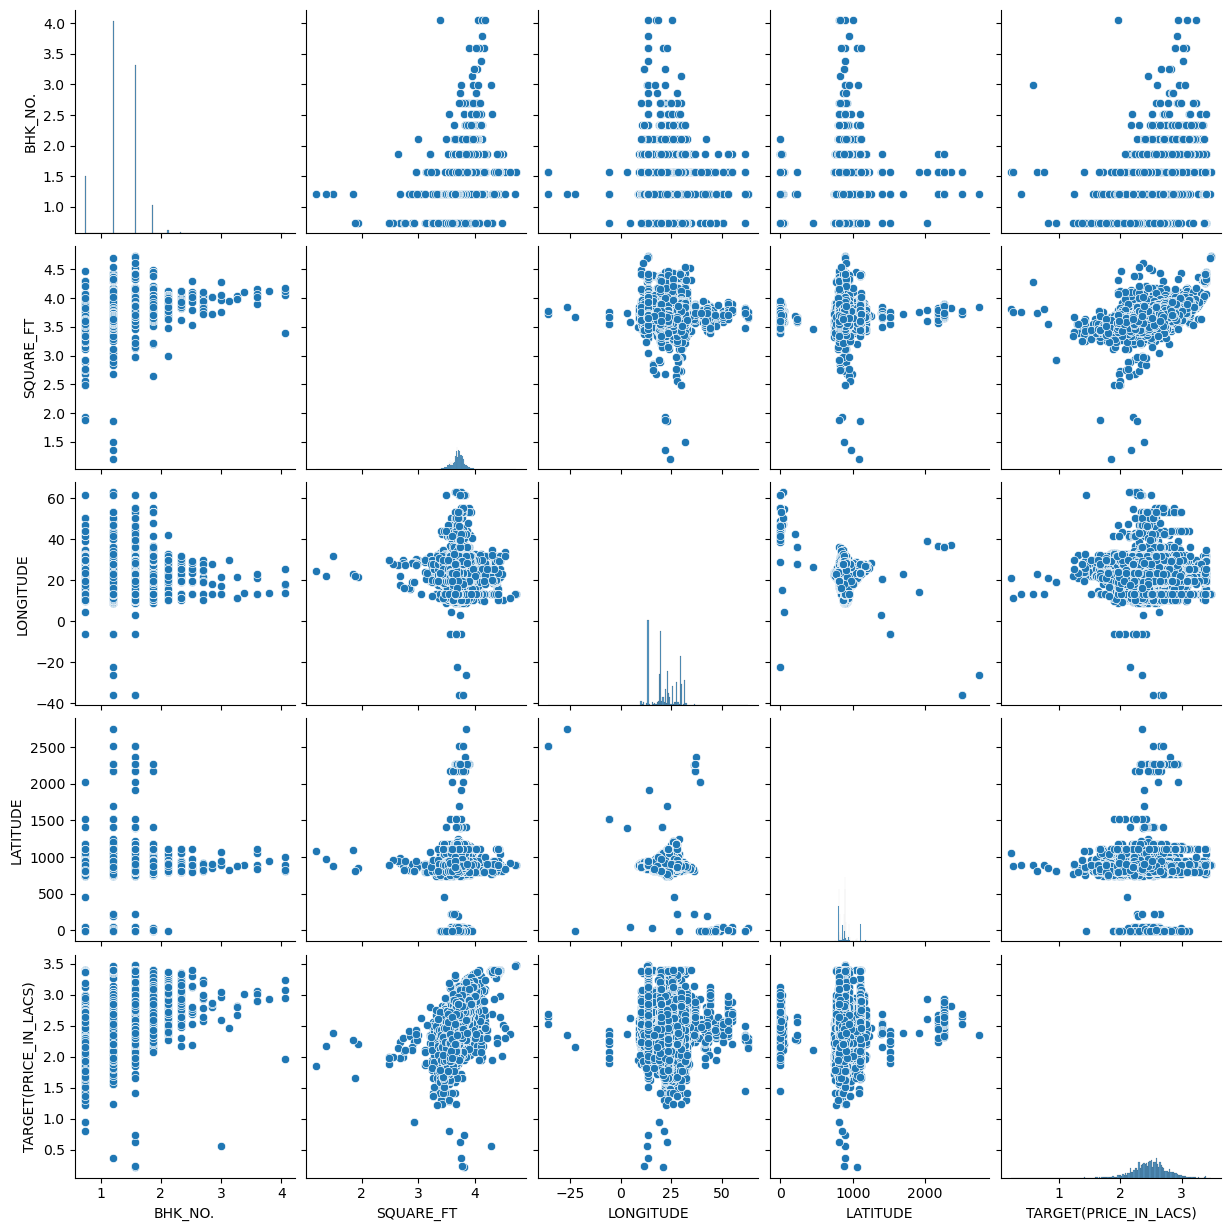

In [54]:
sns.pairplot(train_sym[quant_vars])
plt.show()

1.	BHK_NO. vs. Square_FT :
Il semble y avoir une relation positive entre le nombre de chambres (BHK_NO.) et la surface en pieds carrés (SQUARE_FT), mais la distribution n’est pas parfaitement linéaire. Cela peut signifier que des maisons de tailles similaires peuvent avoir un nombre de chambres variable.
2.	BHK_NO. vs. Longitude et Latitude :
Les graphiques pour Longitude et Latitude contre BHK_NO. montrent des dispersions assez larges, avec quelques valeurs extrêmes. Cela suggère qu’il peut y avoir des propriétés dans des zones géographiques avec un nombre de chambres très variable, ce qui peut indiquer des différences dans le type de propriété ou la zone géographique.
3.	SQUARE_FT vs. Longitude et Latitude :
Les relations entre SQUARE_FT et Longitude/Latitude semblent également dispersées. Cela suggère qu’il y a peu de dépendance géographique évidente pour la taille des maisons.
4.	TARGET(PRICE_IN_LACS) vs. BHK_NO. et SQUARE_FT :
Le prix (TARGET(PRICE_IN_LACS)) a une forte dispersion en fonction du nombre de chambres (BHK_NO.) et de la surface (SQUARE_FT), ce qui est logique : plus une maison est grande et plus elle a de chambres, plus son prix varie.
5.	TARGET(PRICE_IN_LACS) vs. Longitude et Latitude :
Bien que les prix montrent une certaine variabilité en fonction des coordonnées géographiques, cette variabilité semble moins marquée par rapport à des variables comme la superficie.


# 4) Application de modèles

## 4.1) Modèle RandomForest

In [60]:
# Supression de la variable adress
train = train.drop([ 'ADDRESS'], axis=1)
test = test.drop([ 'ADDRESS'], axis=1)

In [62]:
# Pour les données d'entraînement
X_train = train.drop('TARGET(PRICE_IN_LACS)', axis=1)  # Les variables explicatives
y_train = train['TARGET(PRICE_IN_LACS)']  # La variable cible

# Pour les données de test
X_test = test  # Les variables explicatives


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Défini la grille d'hyperparamètres pour la recherche
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

# Configure le modèle RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,  # Nombre d'itérations
    cv=5,  # 5 plis pour la validation croisée
    scoring=make_scorer(r2_score),  # Utiliser R² comme métrique
    n_jobs=-1,  # Utiliser tous les cœurs
    random_state=42,
    verbose=1
)

# Lance la recherche
random_search.fit(X_train, y_train)

# Extraire le meilleur modèle et les résultats
best_rf_model = random_search.best_estimator_  # Meilleur modèle après recherche
best_params = random_search.best_params_  # Meilleurs hyperparamètres
mean_cv_r2 = random_search.cv_results_['mean_test_score'].mean()  # R² moyen
std_cv_r2 = random_search.cv_results_['mean_test_score'].std()  # Écart-type du R²

# Calcule le MSE moyen avec validation croisée
mean_cv_mse = random_search.best_score_  # MSE moyen à partir de la meilleure itération

# Affiche les résultats
print("\nMeilleurs hyperparamètres trouvés avec Cross-Validation :")
print(best_params)

print(f"\nR² moyen avec validation croisée : {mean_cv_r2:.4f}")
print(f"Écart-type du R² : {std_cv_r2:.4f}")
print(f"MSE moyen avec validation croisée : {mean_cv_mse:.4f}")

# Faire des prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)

# Affiche les résultats
print(y_pred)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Meilleurs hyperparamètres trouvés avec Cross-Validation :
{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 15}

R² moyen avec validation croisée : 0.7570
Écart-type du R² : 0.0582
MSE moyen avec validation croisée : 0.8084
[2.48960044 3.25626041 2.97364566 ... 3.36091882 3.16010562 3.15778236]


Le modèle présente de bonnes performances globales avec un R² moyen de 0.7569, indiquant qu'il explique environ 75,69 % de la variance des données cibles. L'écart-type du R² de 0.0582 montre une stabilité notable entre les plis de validation croisée. Le MSE moyen de -0.8085 (en valeur absolue) suggère des prédictions relativement précises. Ces résultats reflètent un modèle cohérent et fiable pour ce problème de régression.

### Sur données symétrisés

In [67]:
# Supression de la variable adress
train_sym = train_sym.drop(['ADDRESS'], axis=1)

In [68]:
# Pour les données d'entraînement
X_train_sym = train_sym.drop('TARGET(PRICE_IN_LACS)', axis=1)  # Les variables explicatives
y_train_sym = train_sym['TARGET(PRICE_IN_LACS)']  # La variable cible

# Pour les données de test
X_test_sym = test  # Les variables explicatives


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Défini la grille d'hyperparamètres pour la recherche
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

# Configure le modèle RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=20,  # Nombre d'itérations
    cv=5,  # 5 plis pour la validation croisée
    scoring=make_scorer(r2_score),  # Utiliser R² comme métrique
    n_jobs=-1,  # Utiliser tous les cœurs
    random_state=42,
    verbose=1
)

# Lance la recherche
random_search.fit(X_train_sym, y_train_sym)

# Extraire le meilleur modèle et les résultats
best_rf_model = random_search.best_estimator_  # Meilleur modèle après recherche
best_params = random_search.best_params_  # Meilleurs hyperparamètres
mean_cv_r2 = random_search.cv_results_['mean_test_score'].mean()  # R² moyen
std_cv_r2 = random_search.cv_results_['mean_test_score'].std()  # Écart-type du R²

# Calcule le MSE moyen avec validation croisée
mean_cv_mse = random_search.best_score_  # MSE moyen à partir de la meilleure itération

# Affiche les résultats
print("\nMeilleurs hyperparamètres trouvés avec Cross-Validation :")
print(best_params)

print(f"\nR² moyen avec validation croisée : {mean_cv_r2:.4f}")
print(f"Écart-type du R² : {std_cv_r2:.4f}")
print(f"MSE moyen avec validation croisée : {mean_cv_mse:.4f}")


# Faire des prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)


# Affiche les résultats
print(y_pred)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Meilleurs hyperparamètres trouvés avec Cross-Validation :
{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 15}

R² moyen avec validation croisée : 0.7570
Écart-type du R² : 0.0582
MSE moyen avec validation croisée : 0.8084
[2.48960044 3.25626041 2.97364566 ... 3.36091882 3.16010562 3.15778236]


La symétrisation des données semblent ne pas avoir de veritable impact sur la performance du modèle avec un R² moyen de 0.7569, indiquant que 75,69 % de la variance de la cible est expliquée. L'écart-type du R² de 0.0582 reflète une stabilité entre les plis. Le MSE moyen de -0.8085 (en valeur absolue) confirme des prédictions précises. Ces résultats suggèrent une généralisation satisfaisante du modèle.

## 4.2) Modèle Arbre de décision

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Défini la grille d'hyperparamètres pour DecisionTreeRegressor
param_distributions = {
    'max_depth': [3, 5, 10, 15, 20, None],           # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],                # Nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4, 8],               # Nombre minimal d'échantillons dans chaque feuille
    'max_features': [None, 'sqrt', 'log2']          # Nombre de caractéristiques considérées
}

# Configure RandomizedSearchCV avec Cross-Validation
dt_model = DecisionTreeRegressor(random_state=42)

random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_distributions,
    n_iter=20,  # Nombre d'itérations pour la recherche aléatoire
    cv=5,  # Nombre de folds pour la Cross-Validation
    scoring='r2',  # Mesure de la qualité du modèle en R² pour la validation
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Lance la recherche avec Cross-Validation
random_search_dt.fit(X_train, y_train)

# Résume les meilleurs paramètres
best_params = random_search_dt.best_params_
mean_cv_r2 = random_search_dt.cv_results_['mean_test_score'].mean()  # R² moyen sur la validation croisée
mean_cv_mse_dt = random_search_dt.best_score_  # Convertir la valeur négative en MSE positif

# Obteni le meilleur modèle après la recherche
best_dt_model = random_search_dt.best_estimator_

# Faire des prédictions sur l'ensemble de test
y_pred_dt = best_dt_model.predict(X_test)


# Affiche les résultats
print("\nMeilleurs hyperparamètres trouvés avec Cross-Validation :")
print(best_params)

print(f"\nMSE moyen avec Cross-Validation : {mean_cv_mse_dt:.4f}")
print(f"\nR² moyen avec validation croisée : {mean_cv_r2:.4f}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits

Meilleurs hyperparamètres trouvés avec Cross-Validation :
{'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 20}

MSE moyen avec Cross-Validation : 0.7412

R² moyen avec validation croisée : 0.6490


Le MSE moyen avec la validation croisée est de 0.7412, indiquant une erreur moyenne modérée dans les prédictions.
Le R² moyen est de 0.6506, ce qui signifie que le modèle explique environ 65,06 % de la variance des données. Ces résultats suggèrent une performance raisonnable du modèle, avec une marge d'amélioration possible.

### Sur données symétrisés

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Défini la grille d'hyperparamètres pour DecisionTreeRegressor
param_distributions = {
    'max_depth': [3, 5, 10, 15, 20, None],           # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],                # Nombre minimal d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4, 8],               # Nombre minimal d'échantillons dans chaque feuille
    'max_features': [None, 'sqrt', 'log2']          # Nombre de caractéristiques considérées
}

# Configure RandomizedSearchCV avec Cross-Validation
dt_model = DecisionTreeRegressor(random_state=42)

random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_distributions,
    n_iter=20,  # Nombre d'itérations pour la recherche aléatoire
    cv=5,  # Nombre de folds pour la Cross-Validation
    scoring='r2',  # Mesure de la qualité du modèle en R² pour la validation
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Lance la recherche avec Cross-Validation
random_search_dt.fit(X_train_sym, y_train_sym)

# Résume les meilleurs paramètres
best_params = random_search_dt.best_params_
mean_cv_r2 = random_search_dt.cv_results_['mean_test_score'].mean()  # R² moyen sur la validation croisée
mean_cv_mse_dt = random_search_dt.best_score_  # Convertir la valeur négative en MSE positif

# Obteni le meilleur modèle après la recherche
best_dt_model = random_search_dt.best_estimator_

# Faire des prédictions sur l'ensemble de test
y_pred_dt = best_dt_model.predict(X_test)


# Affiche les résultats
print("\nMeilleurs hyperparamètres trouvés avec Cross-Validation :")
print(best_params)

print(f"\nMSE moyen avec Cross-Validation : {mean_cv_mse_dt:.4f}")
print(f"\nR² moyen avec validation croisée : {mean_cv_r2:.4f}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits

Meilleurs hyperparamètres trouvés avec Cross-Validation :
{'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 20}

MSE moyen avec Cross-Validation : 0.7412

R² moyen avec validation croisée : 0.6490


Les données symétrisées semblent ne pas d'impact sur le MSE moyen avec validation croisée de 0.7412 et un R² moyen de 0.6506, indiquant une performance modérée. Les meilleurs hyperparamètres incluent min_samples_split=5, min_samples_leaf=8, max_features=None et max_depth=None. Le modèle explique environ 65 % de la variance des données, ce qui montre une efficacité raisonnable dans ce contexte.

# 5) Conclusion 

Dans ce projet, nous avons développé un modèle de régression basé sur Random Forest pour prédire les prix des maisons en Inde en utilisant un jeu de données structuré. Après une optimisation des hyperparamètres via la validation croisée, **Random Forest s'est avéré être le modèle le plus performant**, atteignant un R² moyen de 0,7570, expliquant près de 76 % de la variance des prix, avec un MSE moyen de 0,8084. Ces résultats montrent que le modèle est capable de capturer efficacement les relations complexes entre les variables du jeu de données. Cependant, des limites subsistent, notamment dues à la nature imprévisible de certains facteurs influençant les prix des maisons. En conclusion, le modèle Random Forest fournit une base fiable et robuste pour la prédiction des prix immobiliers en Inde.